<a href="https://colab.research.google.com/github/sergiobm3/ESI_MachineLearning/blob/NLP/SSJ_Task2_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> We are the SSJ team and this is our work about natural language processing.

---

In [ ]:
import io
import pandas as pd
from google.colab import files
import re

## 0. Loading Data

We start by loading the data file that contains the tweets with which the study will work. The file format to upload is CSV.

For this purpose, we use some commands provided by Google Colab itself to access files on our computer.

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')),sep=',')

df

Saving labeled_data.csv to labeled_data (1).csv
User uploaded file "labeled_data.csv" with length 2546446 bytes


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


3 classes: 0 --> hate speech, 1 --> offensive language, 2 --> neither

# 1. Preprocessing

Before starting, it is necessary to preprocess the tweet field of the dataset that is provided to us, in order to work in a more efficient and accurate way.

## Remove unuseful data

Some symbols that do not provide information have been eliminated.

In [ ]:
pattern = "\"#$%&'()*+, -./:;<=>?@[\]^_`{|}~“”…»’"

def cleanUnusefulData(sentence):
  sentence = sentence.translate(str.maketrans('', '', pattern))
  return sentence

def removeUnusefulExclamation(sentence):
  if sentence[0] == '!':
    sentence = removeUnusefulExclamation(sentence[1:])
  else:
    return sentence
  return sentence

clean_tweet = []
for t in range(0,len(df)):
  tweet = df.iloc[t]['tweet']
  tweet = removeUnusefulExclamation(tweet)
  clean_tweet.append(tweet)

df['clean_tweet'] = clean_tweet


## Replace emoticons

We replace the emoticons with words that resemble what they want to express. You must upload the emoticons.txt file.

In [ ]:
dict_emoticons = {}
with open('emoticons.txt') as f:
    for linea in f:
      info = linea.split(",")
      emoticon_code = info[0]
      emoticon_word = info[2]
      dict_emoticons[emoticon_code] = emoticon_word[:len(emoticon_word)-1]
print(dict_emoticons)

def replaceEmoticon(word):
  if word in dict_emoticons:
    word = word.replace(str(word),dict_emoticons[word])
  return word

def replaceUnknownEmoticon(word):
  m = re.match(r"\\[u][A-Za-z0-9]*",word)
  if m is not None:
    word = ""
  return word

{'😀': 'smile', '😁': 'smile', '😂': 'laugh', '😃': 'smile', '😄': 'smile', '😆': 'smile', '😉': 'wink', '😊': 'smile', '😒': 'unamused', '😕': 'confused', '😗': 'kiss', '😘': 'kiss', '😙': 'kiss', '😚': 'kiss', '😞': 'dissapointed', '😟': 'worried', '😠': 'angry', '😡': 'angry', '😢': 'sad', '😨': 'frightened', '😪': 'sleepy', '😫': 'tired', '😭': 'sad', '😮': 'surprised', '😯': 'surprised', '😱': 'frightened', '😲': 'astonished', '😳': 'flushed', '😴': 'sleepy', '😵': 'confused', '😶': 'quiet', '🤐': 'quiet', '🤒': 'ill', '🤔': 'thoughtful', '🤡': 'clown', '🤢': 'sucks', '🤣': 'laugh', '\U0001f92c': 'angry', '\U0001f92e': 'sucks', '\U0001f92f': 'astonished'}


## Remove contractions
 
A dictionary containing the most common contractions has been implemented, to return instead the "expanded form" of expressing them.

In [ ]:
dict_contractions = {'aren\'t':'are not', 'can\'t':'can not', 'couldn\'t':'could not', 'didn\'t':'did not', 'don\'t':'do not', 'doesn\'t':'does not', 'hadn\'t':'had not',
                       'haven\'t':'have not', 'he\'s':'he is', 'he\'ll':'he will', 'he\'d':'he would', 'here\'s':'here is', 'i\'m':'i am', 'i\'ve':'i have', 'i\'ll':'i will',
                       'i\'d':'i would', 'isn\'t':'is not','it\'s':'it is', 'it\'ll':'it will', 'mustn\'t':'must not', 'she\'s':'she is', 'she\'ll':'she will', 'she\'d':'she would',
                       'shouldn\'t':'should not', 'that\'s':'that is', 'there\'s':'there is', 'they\'re':'they are', 'they\'ve':'they have', 'they\'ll':'they will', 'they\'d':'they would',
                       'they\'d':'they had', 'wasn\'t':'was not', 'we\'re':'we are', 'we\'re':'we are', 'we\'ve':'we have', 'we\'ll':'we will', 'we\'d':'we would', 'weren\'t':'were not', 'what\'s':'what is',
                       'where\'s':'where is', 'who\'s':'who is', 'who\'ll':'who will', 'won\'t':'will not', 'wouldn\'t':'would not', 'you\'re': 'you are', 'you\'ve': 'you have', 
                       'you\'ll':'you will', 'you\'d':'you would', 'y\'all': 'you all', 'could\'ve': 'could have', 'hasn\'t': 'has not', 'let\'s': 'let us'}

def remove_contractions(word):
  return word.replace(word,dict_contractions[word])
  
def is_remove_contractions(word):
  if word in dict_contractions:
    return True    
  else:
    return False

## Executing preprocessing

All the functions defined above will be executed. And other preprocessing steps that have not needed to be defined in a separate function, such as deleting all capital letters.

In [ ]:
# We create a new dataframe to save result in different columns
df_result = pd.DataFrame()

In [ ]:
!pip install tweet-preprocessor

import preprocessor as p
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

p.set_options(p.OPT.EMOJI, p.OPT.URL,p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.ESCAPE_CHAR, p.OPT.RESERVED, p.OPT.NUMBER)
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

###### EXECUTING PREPROCESSING WITHOUT EMOTICONS ######

# Each sentence of tweet
sentences = []
for tweet in df['clean_tweet']:
    result = tknzr.tokenize(tweet)
    list_token = []
    for word in result:
      # Change emoticon for text
      token = replaceEmoticon(word)
      token = replaceUnknownEmoticon(token.encode('unicode-escape').decode('ASCII'))

      if token == "": 
        pass
      else: token = token.encode('ASCII').decode('unicode-escape')

      # Clean hashtag and mentions
      token = p.clean(token)

      # Remove the capital letters, if the word is not capitalized entirely.
      if not token.isupper():
        token = token.lower()
      if token.isupper() and len(token)==1:
        token = token.lower()

      if is_remove_contractions(token): # Remove contractions
        token = remove_contractions(token)
        token = token.split(" ")
        list_token.append(token[0])
        list_token.append(token[1])
      else: # Clean unuseful data (",_,...)
        token = cleanUnusefulData(token)
        if(token is not ""):
          list_token.append(token)
      
    sentences.append(list_token)

df_result['preprocessing_without_emoticons'] = sentences
df_result

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,preprocessing_without_emoticons
0,"[as, a, woman, you, should, not, complain, abo..."
1,"[boy, dats, cold, tyga, dwn, bad, for, cuffin,..."
2,"[dawg, !, !, !, you, ever, fuck, a, bitch, and..."
3,"[she, look, like, a, tranny]"
4,"[the, shit, you, hear, about, me, might, be, t..."
...,...
24778,"[yous, a, muthaf, in, lie, right, !, his, TL, ..."
24779,"[you, have, gone, and, broke, the, wrong, hear..."
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l..."
24781,"[youu, got, wild, bitches, tellin, you, lies]"


In [ ]:
###### EXECUTING PREPROCESSING WITH EMOTICONS ######

# Each sentence of tweet
sentences = []
for tweet in df['clean_tweet']:
    result = tknzr.tokenize(tweet)
    list_token = []
    for word in result:
      # Change emoticon for text
      token = p.clean(word)
      token = replaceUnknownEmoticon(token.encode('unicode-escape').decode('ASCII'))

      if token == "":
        pass
      else: token = token.encode('ASCII').decode('unicode-escape')

      # Remove the capital letters, if the word is not capitalized entirely.
      if not token.isupper():
        token = token.lower()
      if token.isupper() and len(token)==1:
        token = token.lower()

      if is_remove_contractions(token): # Remove contractions
        token = remove_contractions(token)
        token = token.split(" ")
        list_token.append(token[0])
        list_token.append(token[1])
      else: # Clean unuseful data (",_,...)
        token = cleanUnusefulData(token)
        if(token is not ""):
          list_token.append(token)
    
    sentences.append(list_token)

df_result['preprocessing_with_emoticons'] = sentences
df_result

,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[as, a, woman, you, should, not, complain, abo...","[as, a, woman, you, should, not, complain, abo..."
1,"[boy, dats, cold, tyga, dwn, bad, for, cuffin,...","[boy, dats, cold, tyga, dwn, bad, for, cuffin,..."
2,"[dawg, !, !, !, you, ever, fuck, a, bitch, and...","[dawg, !, !, !, you, ever, fuck, a, bitch, and..."
3,"[she, look, like, a, tranny]","[she, look, like, a, tranny]"
4,"[the, shit, you, hear, about, me, might, be, t...","[the, shit, you, hear, about, me, might, be, t..."
...,...,...
24778,"[yous, a, muthaf, in, lie, right, !, his, TL, ...","[yous, a, muthaf, in, lie, right, !, his, TL, ..."
24779,"[you, have, gone, and, broke, the, wrong, hear...","[you, have, gone, and, broke, the, wrong, hear..."
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l..."
24781,"[youu, got, wild, bitches, tellin, you, lies]","[youu, got, wild, bitches, tellin, you, lies]"


## Correct Wrong Words

With the following functions it is possible to implement a word corrector, which will use the big.txt file to correct the words of the tweets. Therefore, the big.txt file needs to be loaded.

In [ ]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

⚠️⚠️ **¡¡¡ NO EXECUTE !!!** ⚠️⚠️

Using the following piece of code, we correct all the words in the tweets. However, the execution time is approximately 30 minutes. 

Therefore, we have provided the resulting CSV separately. You can run it in the following part of code.

In [ ]:
########## ⚠️ HIGH EXECUTION TIME ⚠️ ##########
df_correct_words = pd.DataFrame(columns=['preprocessing_with_emoticons','preprocessing_without_emoticons'])

listaTweetsWithout = []
for i in range(0,len(df_result['preprocessing_without_emoticons'])):
  listaTweet = []
  for j in range(0,len(df_result['preprocessing_without_emoticons'][i])):
    listaTweet.append(correction(df_result['preprocessing_without_emoticons'][i][j]))
  listaTweetsWithout.append(listaTweet)

listaTweetsWith = []
for i in range(0,len(df_result['preprocessing_with_emoticons'])):
  listaTweet = []
  for j in range(0,len(df_result['preprocessing_with_emoticons'][i])):
    listaTweet.append(correction(df_result['preprocessing_with_emoticons'][i][j]))
  listaTweetsWith.append(listaTweet)

df_correct_words['preprocessing_without_emoticons'] = listaTweetsWithout
df_correct_words['preprocessing_with_emoticons'] = listaTweetsWith
df_correct_words

df_correct_words.to_csv('df_correct_words.csv')
################################################

✔️✔️ **EXECUTE THIS** ✔️✔️

You need to have the file *df_correct_words.csv* uploaded

In [ ]:
pd.read_csv('df_correct_words.csv', sep=',', index_col=0)

,preprocessing_with_emoticons,preprocessing_without_emoticons
0,"['as', 'a', 'woman', 'you', 'should', 'not', '...","['as', 'a', 'woman', 'you', 'should', 'not', '..."
1,"['boy', 'days', 'cold', 'tea', 'down', 'bad', ...","['boy', 'days', 'cold', 'tea', 'down', 'bad', ..."
2,"['dawn', 'a', 'a', 'a', 'you', 'ever', 'fuck',...","['dawn', 'a', 'a', 'a', 'you', 'ever', 'fuck',..."
3,"['she', 'look', 'like', 'a', 'tyranny']","['she', 'look', 'like', 'a', 'tyranny']"
4,"['the', 'shit', 'you', 'hear', 'about', 'me', ...","['the', 'shit', 'you', 'hear', 'about', 'me', ..."
...,...,...
24778,"['you', 'a', 'mutual', 'in', 'lie', 'right', '...","['you', 'a', 'mutual', 'in', 'lie', 'right', '..."
24779,"['you', 'have', 'gone', 'and', 'broke', 'the',...","['you', 'have', 'gone', 'and', 'broke', 'the',..."
24780,"['young', 'buck', 'anna', 'eat', 'a', 'a', 'da...","['young', 'buck', 'anna', 'eat', 'a', 'a', 'da..."
24781,"['you', 'got', 'wild', 'birches', 'telling', '...","['you', 'got', 'wild', 'birches', 'telling', '..."


## Stop words

A stop word is a word in common use, which does not provide information. It does not influence when expressing feelings of hatred. Therefore, we eliminate them.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english'))
clear_sent_emoticon = []
clear_sent_not_emoticon = []
for tweet in range(0,len(df_result['preprocessing_with_emoticons'])):
  clear_sent_emoticon.append([word for word in df_result['preprocessing_with_emoticons'][tweet] if word not in english_stops]) 
  clear_sent_not_emoticon.append([word for word in df_result['preprocessing_without_emoticons'][tweet] if word not in english_stops]) 

df_result['preprocessing_with_emoticons'] = clear_sent_emoticon
df_result['preprocessing_without_emoticons'] = clear_sent_not_emoticon
df_result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always..."
1,"[boy, dats, cold, tyga, dwn, bad, cuffin, dat,...","[boy, dats, cold, tyga, dwn, bad, cuffin, dat,..."
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,..."
3,"[look, like, tranny]","[look, like, tranny]"
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,..."
...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,..."
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne..."
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l..."
24781,"[youu, got, wild, bitches, tellin, lies]","[youu, got, wild, bitches, tellin, lies]"


## Lemmatize all terms

With lemmatization we group the inflected forms of the different words so that they can be analyzed as a single element.

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
clear_sent_emoticon = []
clear_sent_not_emoticon = []
for tweet in range(0,len(df_result['preprocessing_with_emoticons'])):
  clear_sent_emoticon.append([lemmatizer.lemmatize(word) for word in df_result['preprocessing_with_emoticons'][tweet]])
  clear_sent_not_emoticon.append([lemmatizer.lemmatize(word) for word in df_result['preprocessing_without_emoticons'][tweet]])

df_result['preprocessing_with_emoticons'] = clear_sent_emoticon
df_result['preprocessing_without_emoticons'] = clear_sent_not_emoticon
df_result

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always..."
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ..."
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,..."
3,"[look, like, tranny]","[look, like, tranny]"
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,..."
...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,..."
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne..."
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l..."
24781,"[youu, got, wild, bitch, tellin, lie]","[youu, got, wild, bitch, tellin, lie]"


# 2. Vectorization

When the tweets are preprocessed, we can start to obtain information from them.

The goal of this section is to obtain a dataframe with all the information which will be used for the next one, in order to classify the tweets.


## Destokenizador

To do the vectorization, we have chosen to put back all the tokens that make a sentence. We think that this will make the development of this process easier.

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

tweets_detokenize_with_emoticon = []
tweets_detokenize_without_emoticon = []

for i in range(0,len(df_result)):
  tweets_detokenize_with_emoticon.append( TreebankWordDetokenizer().detokenize(df_result.iloc[i]['preprocessing_with_emoticons']))
  tweets_detokenize_without_emoticon.append( TreebankWordDetokenizer().detokenize(df_result.iloc[i]['preprocessing_without_emoticons']))

df_result['detokenization_with_emoticons'] = tweets_detokenize_with_emoticon
df_result['detokenization_without_emoticons'] = tweets_detokenize_without_emoticon
df_result

,preprocessing_without_emoticons,preprocessing_with_emoticons,detokenization_with_emoticons,detokenization_without_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always...",woman complain cleaning house man always take ...,woman complain cleaning house man always take ...
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...",boy dat cold tyga dwn bad cuffin dat hoe st pl...,boy dat cold tyga dwn bad cuffin dat hoe st pl...
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,...",dawg!!! ever fuck bitch start cry confused shit,dawg!!! ever fuck bitch start cry confused shit
3,"[look, like, tranny]","[look, like, tranny]",look like tranny,look like tranny
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,...",shit hear might true might faker bitch told ya,shit hear might true might faker bitch told ya
...,...,...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,...",yous muthaf lie right! TL trash mine bible scr...,yous muthaf lie right! TL trash mine bible scr...
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne...",gone broke wrong heart baby drove redneck crazy,gone broke wrong heart baby drove redneck crazy
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l...",young buck wanna eat!! dat nigguh like aint fu...,young buck wanna eat!! dat nigguh like aint fu...
24781,"[youu, got, wild, bitch, tellin, lie]","[youu, got, wild, bitch, tellin, lie]",youu got wild bitch tellin lie,youu got wild bitch tellin lie


## TFIDF

In order to start using TFIDF, we will first have to create a TFIDFVectorizer.

With Tfidfvectorizer you compute the word counts, idf and tf-idf values all at once. Three steps at once

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,2))

X = vectorizer.fit_transform(tweets_detokenize_without_emoticon)
#Y = vectorizer.fit_transform(tweets_detokenize_with_emoticon)

This is the TFIDF of the first tweet of the CSV file (whitout emoticons).

In [ ]:
print(df_result['detokenization_without_emoticons'][0])
print(X[0])

woman complain cleaning house man always take trash
  (0, 105323)	0.27098208089269676
  (0, 2566)	0.31449637364443767
  (0, 67894)	0.3272234883970231
  (0, 52975)	0.3272234883970231
  (0, 20348)	0.31449637364443767
  (0, 21746)	0.3272234883970231
  (0, 120531)	0.31449637364443767
  (0, 111102)	0.12870864546435629
  (0, 105155)	0.16811602350929325
  (0, 2412)	0.1721106342423441
  (0, 67888)	0.151553210732432
  (0, 52929)	0.19595342100502908
  (0, 20347)	0.28790060280466584
  (0, 21738)	0.24328483117070612
  (0, 120496)	0.17529347505063608


We are going to calculate the TFIDF of both the tweets without emoticons and those that keep them, and we will save them in our dataset.

In [ ]:
listaTFIDFWithout = []

for i in range(0,len(df_result)):
  listaTFIDFWithout.append(X[i].toarray())

df_result['TDIDF_without_emoticons'] = listaTFIDFWithout


In [ ]:
listaTFIDFWith = [] ##### OJO: AQUÍ ME HA PETADO DOS VECES POR RAM!!!! :(

for i in range(0,len(df_result)):
  listaTFIDFWith.append(Y[i].toarray())

df_result['TDIDF_with_emoticons'] = listaTFIDFWith

In [ ]:
df_result

,preprocessing_without_emoticons,preprocessing_with_emoticons,detokenization_with_emoticons,detokenization_without_emoticons,TDIDF_without_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always...",woman complain cleaning house man always take ...,woman complain cleaning house man always take ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...",boy dat cold tyga dwn bad cuffin dat hoe st pl...,boy dat cold tyga dwn bad cuffin dat hoe st pl...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,...",dawg!!! ever fuck bitch start cry confused shit,dawg!!! ever fuck bitch start cry confused shit,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,"[look, like, tranny]","[look, like, tranny]",look like tranny,look like tranny,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,...",shit hear might true might faker bitch told ya,shit hear might true might faker bitch told ya,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,...",yous muthaf lie right! TL trash mine bible scr...,yous muthaf lie right! TL trash mine bible scr...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne...",gone broke wrong heart baby drove redneck crazy,gone broke wrong heart baby drove redneck crazy,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l...",young buck wanna eat!! dat nigguh like aint fu...,young buck wanna eat!! dat nigguh like aint fu...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
24781,"[youu, got, wild, bitch, tellin, lie]","[youu, got, wild, bitch, tellin, lie]",youu got wild bitch tellin lie,youu got wild bitch tellin lie,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


## TFIDF + N-grams

⚠️⚠️ **¡¡¡ NO EXECUTE !!!** ⚠️⚠️

Using the following piece of code, we calculate the n-grams with range (1, 3) of each tweet. But the execution time is very high.

Therefore, we have provided the resulting CSV separately. You can run it in the following part of code.

In [ ]:
########## ⚠️ HIGH EXECUTION TIME ⚠️ ##########
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=1)
list_valuesX = df['detokenization_with_emoticons']
list_valuesY = df['detokenization_without_emoticons']

X = vectorizer.fit_transform(list_valuesX)

Y = vectorizer.fit_transform(list_valuesY)

df_ngrams = pd.DataFrame(columns=['ngrams_with_emoticons','ngrams_without_emoticons'])

listaNGRAMSWithout = []

for i in range(0,len(df)):
    listaNGRAMSWithout.append(X[i].toarray())

df_ngrams['ngrams_with_emoticons'] = listaNGRAMSWithout

listaNGRAMSWith = []

for i in range(0,len(df)):
    listaNGRAMSWith.append(Y[i].toarray())

df_ngrams['ngrams_without_emoticons'] = listaNGRAMSWith

df_ngrams.to_csv('df_ngrams')
################################################

✔️✔️ **EXECUTE THIS** ✔️✔️

You need to have the file *df_ngrams.csv* uploaded

In [ ]:
df_ngrams = pd.read_csv('df_ngrams.csv')
df_result['ngrams_with_emoticons'] = df_ngrams['ngrams_with_emoticons']
df_result['ngrams_without_emoticons'] = df_ngrams['ngrams_without_emoticons']
df_result

,preprocessing_without_emoticons,preprocessing_with_emoticons,detokenization_with_emoticons,detokenization_without_emoticons,TDIDF_without_emoticons,TDIDF_with_emoticons,ngrams_with_emoticons,ngrams_without_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always...",woman complain cleaning house man always take ...,woman complain cleaning house man always take ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[0. 0. 0. ... 0. 0. 0.]],[[0. 0. 0. ... 0. 0. 0.]]
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...",boy dat cold tyga dwn bad cuffin dat hoe st pl...,boy dat cold tyga dwn bad cuffin dat hoe st pl...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[0. 0. 0. ... 0. 0. 0.]],[[0. 0. 0. ... 0. 0. 0.]]
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,...",dawg!!! ever fuck bitch start cry confused shit,dawg!!! ever fuck bitch start cry confused shit,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[0. 0. 0. ... 0. 0. 0.]],[[0. 0. 0. ... 0. 0. 0.]]
3,"[look, like, tranny]","[look, like, tranny]",look like tranny,look like tranny,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[0. 0. 0. ... 0. 0. 0.]],[[0. 0. 0. ... 0. 0. 0.]]
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,...",shit hear might true might faker bitch told ya,shit hear might true might faker bitch told ya,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[0. 0. 0. ... 0. 0. 0.]],[[0. 0. 0. ... 0. 0. 0.]]
...,...,...,...,...,...,...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, right, !, TL, trash, mine,...",yous muthaf lie right! TL trash mine bible scr...,yous muthaf lie right! TL trash mine bible scr...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[0. 0. 0. ... 0. 0. 0.]],[[0. 0. 0. ... 0. 0. 0.]]
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne...",gone broke wrong heart baby drove redneck crazy,gone broke wrong heart baby drove redneck crazy,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[0. 0. 0. ... 0. 0. 0.]],[[0. 0. 0. ... 0. 0. 0.]]
24780,"[young, buck, wanna, eat, !, !, dat, nigguh, l...","[young, buck, wanna, eat, !, !, dat, nigguh, l...",young buck wanna eat!! dat nigguh like aint fu...,young buck wanna eat!! dat nigguh like aint fu...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[0. 0. 0. ... 0. 0. 0.]],[[0. 0. 0. ... 0. 0. 0.]]
24781,"[youu, got, wild, bitch, tellin, lie]","[youu, got, wild, bitch, tellin, lie]",youu got wild bitch tellin lie,youu got wild bitch tellin lie,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[[0. 0. 0. ... 0. 0. 0.]],[[0. 0. 0. ... 0. 0. 0.]]


## TFIDF + N-grams + POS tagging

Through POS tagging, we assign each word its corresponding grammatical category.

In [ ]:
nltk.download('averaged_perceptron_tagger')

listaTweets = []
for tweet in df_result['preprocessing_without_emoticons']:
  listaTweets.append(nltk.pos_tag(tweet))

df_result['POS'] = listaTweets
df_result['POS']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


0        [(woman, NN), (complain, VB), (cleaning, NN), ...
1        [(boy, NN), (dat, NN), (cold, JJ), (tyga, NN),...
2        [(dawg, NN), (!, .), (!, .), (!, .), (ever, RB...
3                   [(look, NN), (like, IN), (tranny, NN)]
4        [(shit, NNS), (hear, JJ), (might, MD), (true, ...
                               ...                        
24778    [(yous, JJ), (muthaf, NNS), (lie, RB), (right,...
24779    [(gone, VBN), (broke, VBD), (wrong, JJ), (hear...
24780    [(young, JJ), (buck, NN), (wanna, JJ), (eat, N...
24781    [(youu, NN), (got, VBD), (wild, JJ), (bitch, N...
24782    [(ruffled, VBN), (ntac, RB), (eileen, JJ), (da...
Name: POS, Length: 24783, dtype: object

## TFIDF + N-grams + POS tagging + Other features

### Number  of  words & sentences

To calculate the number of words and sentences that each tweet has, we have decided to use the original tweet, without preprocessing, since we think that it is more significant in this aspect than the already processed tweet, which removes words.

In [ ]:
from nltk.tokenize import word_tokenize

listNumberWords = []

for i in range(0,len(df['tweet'])):
  words = word_tokenize(df['tweet'][i])
  num_words = len(words)
  listNumberWords.append(num_words)

df_result['number_of_words'] = listNumberWords 
df_result['number_of_words']


0        34
1        26
2        35
3        20
4        43
         ..
24778    39
24779    15
24780    17
24781     7
24782    25
Name: number_of_words, Length: 24783, dtype: int64

In [ ]:
from nltk.tokenize import sent_tokenize

listNumberSentences = []

for i in range(0,len(df['tweet'])):
  sentences = sent_tokenize(df['tweet'][i])
  num_sentences = len(sentences)
  listNumberSentences.append(num_sentences)

df_result['number_of_sentences'] = listNumberSentences
df_result['number_of_sentences']

0        3
1        3
2        4
3        2
4        2
        ..
24778    4
24779    1
24780    2
24781    1
24782    2
Name: number_of_sentences, Length: 24783, dtype: int64

### Hatred n-gram dictionary

⚠️⚠️ ¡¡¡ NO EXECUTE !!! ⚠️⚠️

Using the following piece of code, we NO SE QUE PONER. But the execution time is very high.

Therefore, we have provided the resulting CSV separately. You can run it in the following part of code.

In [ ]:
########## ⚠️ HIGH EXECUTION TIME ⚠️ ##########
values = []
for x in range(0,len(df_result)):
  sentence = df_result.iloc[x]['detokenization_without_emoji']
  n = 0
  value = 0
  
  for i in range(0,len(hatredDF)):
    pattern = hatredDF.iloc[i]['ngram']
    result = re.match(pattern,sentence)
    if result is not None:
      n += 1
      value += float(hatredDF.iloc[i]['prophate'])
  if n != 0:
    value = value / n
  values.append(value)
  print("{} and {}".format(value,len(values)))

df_result['hatred_ngrams'] = values
# Coto dice que falta un to_csv, pero... si ya lo estamos metiendo en el df result el values, que mas da no?
################################################

✔️✔️ EXECUTE THIS ✔️✔️

You need to have the file *hatred_ngrams.csv* uploaded


In [ ]:
hatredDF = pd.read_csv('hatred_ngrams.csv')
df_result['hatred_ngrams'] = hatredDF['hatred_ngrams']
df_result.head()

,preprocessing_without_emoticons,preprocessing_with_emoticons,detokenization_with_emoticons,detokenization_without_emoticons,TDIDF_without_emoticons,POS,number_of_words,number_of_sentences,hatred_ngrams
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always...",woman complain cleaning house man always take ...,woman complain cleaning house man always take ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(woman, NN), (complain, VB), (cleaning, NN), ...",34,3,0.0
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...",boy dat cold tyga dwn bad cuffin dat hoe st pl...,boy dat cold tyga dwn bad cuffin dat hoe st pl...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(boy, NN), (dat, NN), (cold, JJ), (tyga, NN),...",26,3,0.0
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,...",dawg!!! ever fuck bitch start cry confused shit,dawg!!! ever fuck bitch start cry confused shit,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(dawg, NN), (!, .), (!, .), (!, .), (ever, RB...",35,4,0.0
3,"[look, like, tranny]","[look, like, tranny]",look like tranny,look like tranny,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(look, NN), (like, IN), (tranny, NN)]",20,2,0.0
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,...",shit hear might true might faker bitch told ya,shit hear might true might faker bitch told ya,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(shit, NNS), (hear, JJ), (might, MD), (true, ...",43,2,0.0


###Sentiment analisis

Thanks to sentiment analysis we will identify and extract subjective characteristics from the tweets to be analyzed. To carry out this task, the VADER library will be used. VADER will return the following values:

- Pos: The probability that the sentiment is positive.
- Neu: The probability that the sentiment is neutral.
- Neg: The probability that the sentiment is negative.
- Compound: The normalized composite score that calculates the sum of all the scores, takes a value between -1 and 1.

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_analyzer  = SentimentIntensityAnalyzer() 

negative = []
positive = []
neutral = []
compound = []

for tweet in df_result['detokenization_with_emoticons']:
  sentiment = sentiment_analyzer.polarity_scores(tweet)
  negative.append(sentiment['neg'])
  positive.append(sentiment['pos'])
  neutral.append(sentiment['neu'])
  compound.append(sentiment['compound'])

df_result['Negative'] = negative
df_result['Positive'] = positive
df_result['Neutral'] = neutral
df_result['Compound'] = compound
df_result.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,preprocessing_without_emoticons,preprocessing_with_emoticons,detokenization_with_emoticons,detokenization_without_emoticons,TDIDF_without_emoticons,POS,number_of_words,number_of_sentences,hatred_ngrams,Negative,Positive,Neutral,Compound
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always...",woman complain cleaning house man always take ...,woman complain cleaning house man always take ...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(woman, NN), (complain, VB), (cleaning, NN), ...",34,3,0.0,0.263,0.000,0.737,-0.3612
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...",boy dat cold tyga dwn bad cuffin dat hoe st pl...,boy dat cold tyga dwn bad cuffin dat hoe st pl...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(boy, NN), (dat, NN), (cold, JJ), (tyga, NN),...",26,3,0.0,0.290,0.000,0.710,-0.6229
2,"[dawg, !, !, !, ever, fuck, bitch, start, cry,...","[dawg, !, !, !, ever, fuck, bitch, start, cry,...",dawg!!! ever fuck bitch start cry confused shit,dawg!!! ever fuck bitch start cry confused shit,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(dawg, NN), (!, .), (!, .), (!, .), (ever, RB...",35,4,0.0,0.851,0.000,0.149,-0.9530
3,"[look, like, tranny]","[look, like, tranny]",look like tranny,look like tranny,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(look, NN), (like, IN), (tranny, NN)]",20,2,0.0,0.000,0.556,0.444,0.3612
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,...",shit hear might true might faker bitch told ya,shit hear might true might faker bitch told ya,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(shit, NNS), (hear, JJ), (might, MD), (true, ...",43,2,0.0,0.457,0.173,0.370,-0.6808


For example, this is a graphical representation of the sentiment analysis from a tweet.

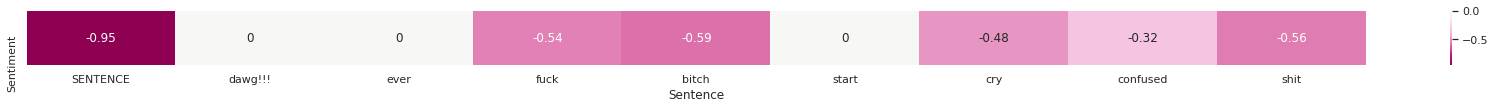

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,1)})
def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

sentence = df_result['detokenization_with_emoticons'][2]
visualise_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sentiment_analyzer.polarity_scores(sentence)["compound"]] + [sentiment_analyzer.polarity_scores(word)["compound"] for word in sentence.split()]
})

# 3. Select features

We have created a new dataset where we have put the characteristics with which we will work from now on. With this dataset, feature selection will be made.

In [ ]:
# We create a new dataframe to save result in different columns
df_features = pd.DataFrame()

df_features['tweet'] = df['tweet']
df_features['tweets_detokenize_without_emoticons'] = df_result['detokenization_without_emoticons']
#df_features['tfidf'] = df_result['tfidf'] ¿QUÉ VA A PASAR CON ESTA COLUMNA?
#df_features['n-grams'] = df_result['n-grams'] ¿QUÉ VA A PASAR CON ESTA COLUMNA?
df_features['number_of_words'] = df_result['number_of_words']
df_features['number_of_sentences'] = df_result['number_of_sentences']
df_features['Negative'] = df_result['Negative']
df_features['Positive'] = df_result['Positive']
df_features['Neutral'] = df_result['Neutral']
df_features['Compound'] = df_result['Compound']
df_features['class'] = df['class']
df_features

KeyError: ignored

With the following graph, we check the correlations that exist between the variables of the dataset.

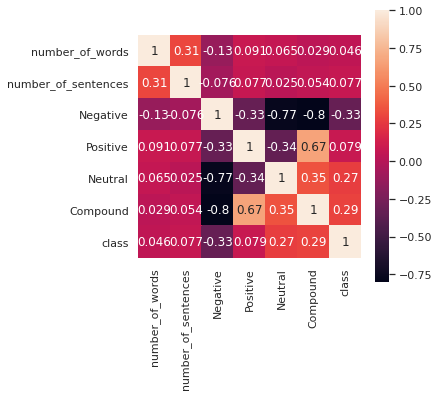

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(df_features.iloc[:,2:9].corr(), square=True, annot=True)

To carry out the selection of characteristics, the selectKBest function will be used. You will have to pass it the number of "top" characteristics that it will choose from the existing ones.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_classif
import numpy as np

# Create features and target variable for Classification problem
X_clf = X 

y_clf = df['class'] # Target variable: class
print(y_clf)

y_clf = np.where(y_clf == 0,0, y_clf)
y_clf = np.where(y_clf == 1,1, y_clf)
y_clf = np.where(y_clf == 2,2, y_clf)
y_clf = y_clf.astype('int')
print(y_clf)

best=SelectKBest(score_func = mutual_info_classif)
X_new = best.fit_transform(X_clf, y_clf)
X_new.shape
selected = best.get_support(indices=True)
print(X_clf.columns[selected]) #error borrar

0        2
1        1
2        1
3        1
4        1
        ..
24778    1
24779    2
24780    1
24781    1
24782    2
Name: class, Length: 24783, dtype: int64
[2 1 1 ... 1 1 2]


With k = 2, the two characteristics that SelectKBest returns are *'Negative'* and *'Compound'*. To these two features we will add the target feature, *'class'*.

# 4. Classification algorithm

Once we know the three characteristics with which we are going to work, it is time to separate the dataset records in the training part and the test part. The test part will be made up of 30% of the tweets.

In [ ]:
#from sklearn.model_selection import train_test_split

#train, test = train_test_split(X_new, test_size=0.3)
#train.reset_index(inplace = True)
#test.reset_index(inplace = True)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_clf, test_size=0.3, random_state=0)
#train.reset_index(inplace = True)
#test.reset_index(inplace = True)

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#import numpy as np

cv = KFold(n_splits = 5, shuffle = True) 

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
       for train_fold, test_fold in cv.split(train):
          # Random train / test division
          f_train = X_train.loc[train_fold]
          f_test = X_train.loc[test_fold]
          # Model training and execution
          knn.fit( X = f_train.drop(['class'], axis=1), 
                               y = f_train['class'])
          y_pred = knn.predict(X = f_test.drop(['class'], axis = 1))
          # Model evaluation
          acc = accuracy_score(f_test['class'], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc')      
    

plt.legend()
plt.show() 


AttributeError: ignored

## Model Execution



Once we have identified the best parameterization we will go on to make an execution of the model and we will graph its results.

### K-nearest neighbors algorithm

With this algorithm we are going to classify the tweets depending on the tweets closest to the one to be predicted.

In [ ]:
# Number of closest tweets that you will consult.
n_neighbors = 3
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights) 
# Fit and predict
knn.fit(X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)
acc = accuracy_score(y_test, y_pred)
print ('Acc', acc)

Acc 0.786684599865501


We show the solution using Voronoi Diagrams


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .05  # Step size in the mesh

X = X_train
y = y_train


In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
             edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
                         

ValueError: ignored

Finally, we obtain the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

**Confusion Matrix**

Normalized confusion matrix
[[0.1264637  0.78454333 0.08899297]
 [0.02418653 0.95493301 0.02088046]
 [0.01506741 0.74147502 0.24345757]]


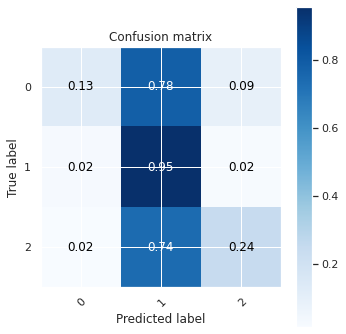

In [ ]:
target_name=np.array(['0', '1', '2'], dtype='<U10')
plot_confusion_matrix(y_test, y_pred, classes=target_name, normalize=True,
                      title='Confusion matrix')
  

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.14      0.18       427
           1       0.81      0.95      0.88      5747
           2       0.66      0.24      0.35      1261

    accuracy                           0.79      7435
   macro avg       0.58      0.44      0.47      7435
weighted avg       0.75      0.79      0.75      7435



### Naive Bayes algorithm

This algorithm is based on Bayes' Theorem. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [ ]:
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB



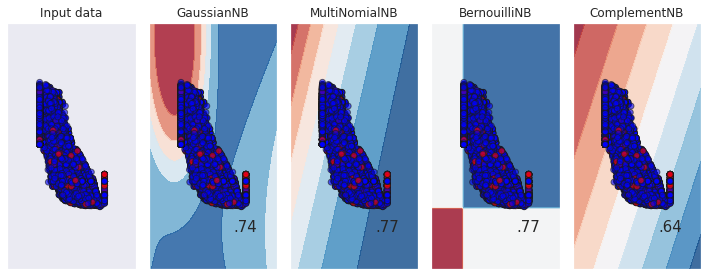

In [ ]:
# Plotting variables
h = .02  # step size in the mesh
i = 1
figure = plt.figure(figsize=(10, 4))

# Classifiers
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]

# Scale
X = MinMaxScaler().fit_transform(X)
# Train and test
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)


# Prepare visualization
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
         edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
              edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

for name, clf in zip(names, classifiers):
  ax = plt.subplot(1, len(classifiers) + 1, i)
  
  # FIT THE MODEL
  clf.fit(X_train, y_train)
  # PREDIT AND SCORE  
  score = clf.score(X_test, y_test) #Returns the mean accuracy on the given test data and labels.
  
  
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
             edgecolors='k')
  # Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
             edgecolors='k', alpha=0.6)

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(name)
  ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
          size=15, horizontalalignment='right')
  i += 1
  
plt.tight_layout()
plt.show()

In [ ]:
clf = GaussianNB() # Classifier chosen
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print ('Acc', acc)

Acc 0.7360230547550433


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

**Confusion Matrix**

Normalized confusion matrix
[[0.         0.89664083 0.10335917]
 [0.         0.87090774 0.12909226]
 [0.         0.63806287 0.36193713]]


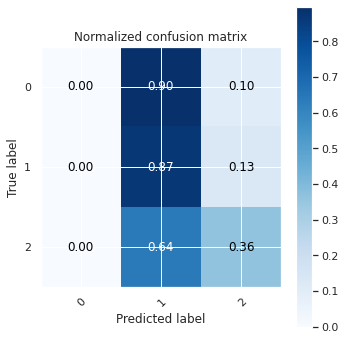

In [ ]:
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=True,
                      title='Normalized confusion matrix')

**Classification Report**

In [ ]:
print(classification_report(test['class'], y_pred)) ### FALLA, NO SE.

ValueError: ignored